In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [123]:
import scipy.stats as ss

In [125]:
df = pd.read_csv('training.csv')

In [126]:
df.head()

,RefId,IsGoodBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,1,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,1,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,1,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,1,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,1,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


# EDA Findings

1. Purchase date needs to be converted into year
2. New attribute--old_yrs should be added as purchDate-vehyear
3. Auction effects the target
4. people dont buy too old or too new cars
5. vehicle age may also effect
6. Make effects the target
7. Model effects
8. Trim effects the target nd having missing value
9. color effects
10. transmission is very unbalanced
11. wheel type not required
12. trim has missing values
13. wheel id has missing values
14. vehOdo effects
15. nationality has missing values

In [82]:
df.shape

(72983, 34)

In [127]:
df

,RefId,IsGoodBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,1,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,1,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,1,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,1,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,1,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
5,6,1,12/7/2009,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,...,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594
6,7,1,12/7/2009,ADESA,2004,5,KIA,SPECTRA,EX,4D SEDAN EX,...,6230.0,8603.0,NaN,NaN,19638,33619,FL,4200.0,0,533
7,8,1,12/7/2009,ADESA,2005,4,FORD,TAURUS,SE,4D SEDAN SE,...,6942.0,8242.0,NaN,NaN,19638,33619,FL,4500.0,0,825
8,9,1,12/7/2009,ADESA,2007,2,KIA,SPECTRA,EX,4D SEDAN EX,...,9637.0,10778.0,NaN,NaN,21973,33619,FL,5600.0,0,482
9,10,1,12/7/2009,ADESA,2007,2,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,...,12580.0,14845.0,NaN,NaN,21973,33619,FL,7700.0,0,1633


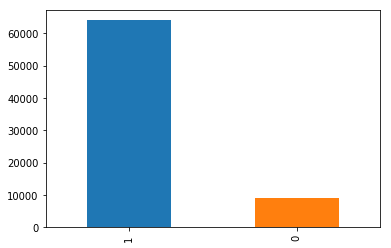

In [128]:
df['IsGoodBuy'].value_counts().plot('bar')

In [85]:
sample = pd.read_csv('example_entry.csv')

In [129]:
df1=df.drop('RefId',1)

In [130]:
df1.head()

,IsGoodBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,1,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,1,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,1,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,1,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


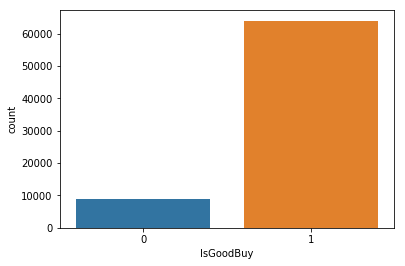

In [131]:
sns.countplot(df1['IsGoodBuy'])

c:\users\praneeth_pc\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


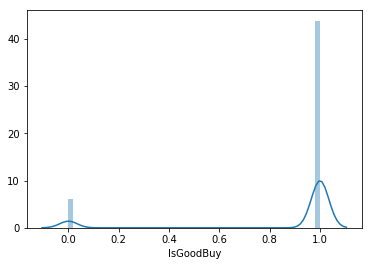

In [132]:
sns.distplot(df1['IsGoodBuy'])

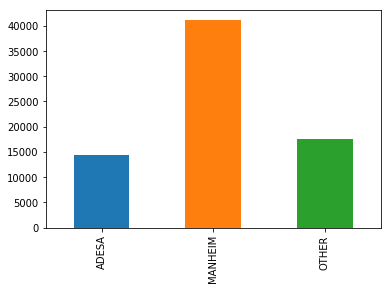

In [133]:
df1['Auction'].value_counts(sort=False).plot('bar')

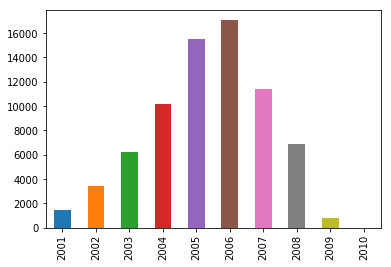

In [95]:
df1['VehYear'].value_counts(sort=False).plot('bar')

(array([1.4810e+03, 3.4050e+03, 6.2270e+03, 1.0207e+04, 1.5489e+04,
        1.7043e+04, 1.1423e+04, 6.8850e+03, 8.2200e+02, 1.0000e+00]),
 array([2001. , 2001.9, 2002.8, 2003.7, 2004.6, 2005.5, 2006.4, 2007.3,
        2008.2, 2009.1, 2010. ]),
 <a list of 10 Patch objects>)

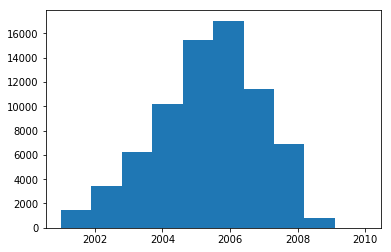

In [91]:
plt.hist(df1['VehYear'])

In [174]:
2360/792983*100

0.29761041535568855

In [180]:
df1.isnull().sum()

IsGoodBuy                                0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice            0
MMRCurrentAuctionCleanPrice            315
MMRCurrentR

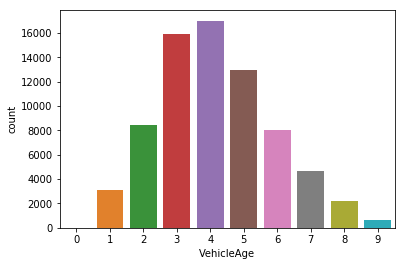

In [96]:
sns.countplot(df['VehicleAge'])

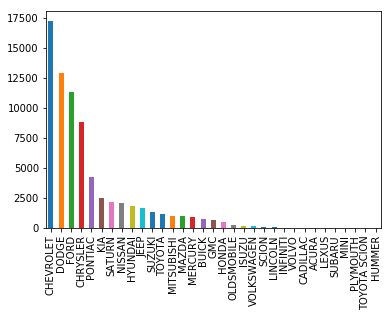

In [93]:
df1['Make'].value_counts().plot('bar')

In [119]:
df1.groupby(['Make','Model']).sum()

IsBadBuy  VehYear  VehicleAge  WheelTypeID  \
Make         Model                                                              
ACURA        3.2 CL                       0     2003           7          1.0   
             3.2 CL 3.2L V 6 NA S         1     6003          24          2.0   
             3.2 TL                       2    16020          59          8.0   
             3.2 TL 3.2L V6 EFI           2    10015          30          5.0   
             3.2 TL 3.2L V6 FI DO         1     4006          12          2.0   
             MDX 4WD                      1     6007          22          2.0   
             MDX 4WD 3.5L V6 EFI          0     2004           5          1.0   
             MDX 4WD 3.5L V6 SOHC         0     2002           7          1.0   
             RSX                          1     4006          13          1.0   
             TL                           0     6014          16          3.0   
             TSX                          1     8018          20          3.0   
BUICK        CENTURY V6                  17   162226         577        137.0   
             CENTURY V6 3.1L V6 S        22   206290         637        174.0   
             LACROSSE                     5   194584         378        154.0   
             LACROSSE 3.6L V6 SFI         0     6018           9          4.0   
             LACROSSE 3.8L V6 SFI         2    86249         138         70.0   
             LE SABRE                    13   128165         470         80.0   
             LE SABRE 3.8L V6 MFI         9    76147         195         43.0   
             LE SABRE 3.8L V6 MPI         0     6010          17          3.0   
             LE SABRE Unspecified         6    76062         280         45.0   
             LUCERNE V6                   0    16051          29          8.0   
             LUCERNE V6 3.8L V6 S         0     6018           9          3.0   
             PARK AVENUE                  2    18018          71          9.0   
             PARK AVENUE 3.8L V6          1    12013          41          9.0   
             RAINIER AWD V6               2    16035          45          8.0   
             RAINIER AWD V6 4.2L          0     8016          20          4.0   
             RAINIER AWD V8               0     2004           6          1.0   
             RAINIER RWD V6               0    14032          38          7.0   
             RAINIER RWD V6 4.2L          0     6013          14          3.0   
             RAINIER RWD V8               0     6012          17          3.0   
...                                     ...      ...         ...          ...   
TOYOTA       RAV-4 2WD Multiple E         0     2001           8          1.0   
             RAV-4 4WD                    1     4008          12          3.0   
             SCION XB                     0     8021          19          7.0   
             SEQUOIA 2WD                  0    14020          50          7.0   
             SEQUOIA 2WD 4.7L V8          0    12013          41          6.0   
             SEQUOIA 4WD                  0     2002           8          1.0   
             SEQUOIA 4WD 4.7L V8          0     2001           8          1.0   
             SIENNA                       1     2002           8          1.0   
             SIENNA 3.0L V6 MPI           1     4004          14          1.0   
             SIENNA 3.0L V6 MPI D         0     4006          12          4.0   
             TACOMA PICKUP 2WD 4C         1    12019          39         10.0   
             TACOMA PICKUP 2WD V6         0     6010          19          4.0   
             TUNDRA PICKUP 2WD V6         2    18030          56         12.0   
             TUNDRA PICKUP 2WD V8         3    86190         220         50.0   
             TUNDRA PICKUP 4WD V8         1    10014          32          5.0   
             YARIS                        0    74281          88         70.0   
             YARIS 1.5L I4 EFI /          0     2007           2  

In [100]:
df1[df1['Model']=='MAZDA3']

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
138,0,3/1/2010,ADESA,2005,5,MAZDA,MAZDA3,s,5D SEDAN GS,GREY,...,9388.0,12501.0,NaN,NaN,19638,33619,FL,7135.0,0,1038
208,0,4/12/2010,ADESA,2005,5,MAZDA,MAZDA3,s,5D SEDAN GS,SILVER,...,9343.0,10966.0,NaN,NaN,19619,33619,FL,7400.0,0,1038
227,0,4/26/2010,ADESA,2004,6,MAZDA,MAZDA3,s,4D SEDAN I,BLUE,...,8351.0,9869.0,NaN,NaN,19638,33619,FL,7100.0,0,1038
312,0,10/25/2010,ADESA,2004,6,MAZDA,MAZDA3,s,4D SEDAN I,SILVER,...,8548.0,9930.0,NaN,NaN,5546,33619,FL,6600.0,0,1197
411,1,12/20/2010,ADESA,2008,2,MAZDA,MAZDA3,i,MAZDA3 4D I SPORT,MAROON,...,14209.0,15895.0,NaN,NaN,5546,33619,FL,7500.0,0,1038
546,1,2/24/2010,ADESA,2006,4,MAZDA,MAZDA3,s,4D SEDAN I,RED,...,11285.0,12392.0,NaN,NaN,52117,20166,VA,8370.0,0,923
681,0,7/14/2010,ADESA,2008,2,MAZDA,MAZDA3,i,4D SEDAN I,BLACK,...,14592.0,16129.0,NaN,NaN,52117,20166,VA,8620.0,0,837
761,0,9/29/2010,ADESA,2004,6,MAZDA,MAZDA3,s,4D SEDAN I,BLUE,...,7431.0,8464.0,NaN,NaN,52117,20166,VA,6170.0,0,1113
1368,0,10/26/2010,ADESA,2007,3,MAZDA,MAZDA3,i,4D SEDAN I,BLACK,...,13537.0,16258.0,NO,GREEN,18881,38118,TN,7630.0,0,923


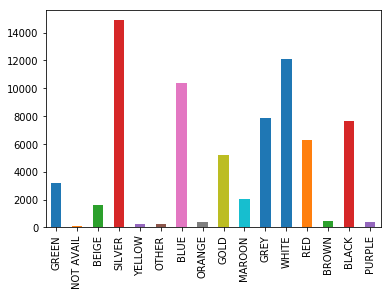

In [99]:
df1['Color'].value_counts(sort=False).plot('bar')

In [97]:
df1.groupby(['IsBadBuy','Color']).mean()

VehYear  VehicleAge  WheelTypeID        VehOdo  \
IsBadBuy Color                                                           
0        BEIGE      2005.510561    4.045885     1.483728  71456.353969   
         BLACK      2005.830403    3.709854     1.481310  70336.264441   
         BLUE       2005.564097    3.952719     1.531083  70038.580476   
         BROWN      2005.371053    4.131579     1.449468  74560.247368   
         GOLD       2004.996662    4.501335     1.484678  71842.480196   
         GREEN      2004.811963    4.672994     1.394842  73760.066619   
         GREY       2005.531967    4.007454     1.476391  72928.337729   
         MAROON     2005.095745    4.430571     1.424658  73298.284994   
         NOT AVAIL  2005.785714    3.428571     1.644068  64681.885714   
         ORANGE     2006.448819    3.154856     1.592105  62665.590551   
         OTHER      2005.596244    3.619718     1.563636  73168.384977   
         PURPLE     2005.132492    4.403785     1.460064  70856.375394   
         RED        2005.464286    4.042158     1.479717  68929.584683   
         SILVER     2005.479972    4.035988     1.535258  70662.621700   
         WHITE      2005.392861    4.107187     1.528867  71415.711029   
         YELLOW     2004.342857    5.190476     1.354369  70219.990476   
1        BEIGE      2004.227488    5.336493     1.345324  76684.758294   
         BLACK      2004.987179    4.583916     1.415888  73079.754079   
         BLUE       2004.860387    4.690496     1.479452  73424.970563   
         BROWN      2004.071429    5.321429     1.291667  77094.696429   
         GOLD       2004.143826    5.355495     1.420578  75777.185889   
         GREEN      2004.154229    5.380597     1.355769  76840.116915   
         GREY       2004.806806    4.759605     1.346939  75490.500549   
         MAROON     2004.219231    5.326923     1.370892  76393.580769   
         NOT AVAIL  2004.833333    4.791667     1.000000  71988.750000   
         ORANGE     2005.911765    3.764706     1.800000  63213.823529   
         OTHER      2004.379310    4.896552     1.461538  73811.413793   
         PURPLE     2004.375000    5.357143     1.348837  74413.000000   
         RED        2004.609697    4.932121     1.417863  73568.241212   
         SILVER     2004.601194    4.948454     1.454416  74284.510038   
         WHITE      2004.571049    4.984064     1.443060  75946.264276   
         YELLOW     2003.823529    5.823529     1.107143  73957.882353   

                    MMRAcquisitionAuctionAveragePrice  \
IsBadBuy Color                                          
0        BEIGE                            6289.452294   
         BLACK                            6871.933944   
         BLUE                             6262.636592   
         BROWN                            6630.431579   
         GOLD                             5639.006008   
         GREEN                            5772.401434   
         GREY                             6680.488883   
         MAROON                           5965.723964   
         NOT AVAIL                        6205.442857   
         ORANGE                           6351.755906   
         OTHER                            6873.173709   
         PURPLE                           5719.321767   
         RED                              6150.838733   
         SILVER                           6104.785128   
         WHITE                            6103.412796   
         YELLOW                           5117.004762   
1        BEIGE                            5044.672986   
         BLACK                            6261.554259   
         BLUE                             5552.285955   
         BROWN                            5200.071429   
         GOLD                             4834.911805   
         GREEN                            5054.141791   
         GREY                             5941.663008   
         MAROON                           5203.784615   
         NOT AVAIL       

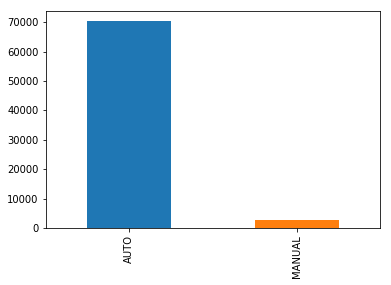

In [98]:
df1['Transmission'].value_counts().plot('bar')

In [94]:
df1['WheelTypeID'].value_counts()

1.0    36050
2.0    33004
3.0      755
0.0        5
Name: WheelTypeID, dtype: int64

In [103]:
df1['Nationality'].value_counts()

AMERICAN          61028
OTHER ASIAN        8033
TOP LINE ASIAN     3722
OTHER               195
Name: Nationality, dtype: int64

In [134]:
corr = df1.corr()

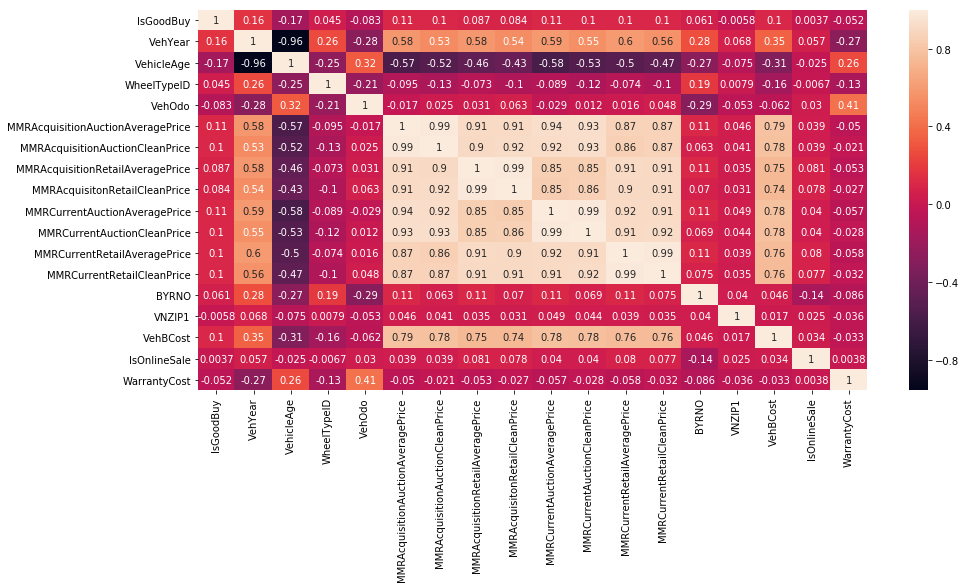

In [135]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr,annot=True,ax=ax)

In [115]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = pd.crosstab(df1["Auction"], df1.IsBadBuy)
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

IsBadBuy      0     1
Auction              
ADESA     12246  2193
MANHEIM   36328  4715
OTHER     15433  2068
dof=2
[[12663.1828371   1775.8171629 ]
 [35995.22218873  5047.77781127]
 [15348.59497417  2152.40502583]]
probability=0.950, critical=5.991, stat=140.540
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [116]:
# contingency table
table = pd.crosstab(df1["Make"], df1.IsBadBuy)
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

IsBadBuy          0     1
Make                     
ACURA            24     9
BUICK           607   113
CADILLAC         28     5
CHEVROLET     15567  1681
CHRYSLER       7707  1137
DODGE         11579  1333
FORD           9563  1742
GMC             574    75
HONDA           443    54
HUMMER            1     0
HYUNDAI        1578   233
INFINITI         28    14
ISUZU           125     9
JEEP           1390   254
KIA            2192   292
LEXUS            20    11
LINCOLN          68    29
MAZDA           821   158
MERCURY         758   155
MINI             16     8
MITSUBISHI      907   123
NISSAN         1752   333
OLDSMOBILE      194    49
PLYMOUTH          1     1
PONTIAC        3751   507
SATURN         1857   306
SCION           118    11
SUBARU           22     6
SUZUKI         1133   195
TOYOTA         1030   114
TOYOTA SCION      1     0
VOLKSWAGEN      115    19
VOLVO            37     0
dof=32
[[2.89414110e+01 4.05858899e+00]
 [6.31448968e+02 8.85510324e+01]
 [2.89414110e+01 

In [117]:
# contingency table
table = pd.crosstab(df1["Model"], df1.IsBadBuy)
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

IsBadBuy                0    1
Model                         
1500 RAM PICKUP 2WD   973  128
1500 RAM PICKUP 4WD    51    6
1500 SIERRA PICKUP 2  121   11
1500 SIERRA PICKUP 4    4    0
1500 SILVERADO PICKU  542   54
1500HD SIERRA PICKUP    0    1
1500HD SILVERADO PIC    8    0
2500 RAM PICKUP 2WD    11    2
2500 RAM PICKUP 4WD     3    0
2500 SILVERADO PICKU    2    0
2500HD SIERRA PICKUP    1    0
2500HD SILVERADO PIC    6    4
3.2 CL                  1    0
3.2 CL 3.2L V 6 NA S    2    1
3.2 TL                  6    2
3.2 TL 3.2L V6 EFI      3    2
3.2 TL 3.2L V6 FI DO    1    1
300                   213   24
300 2.7L V6 MPI       163   11
300 3.5L / 6.0L V12    10    0
300 3.5L V6 MPI        22    0
300 3.5L V6 MPI / SM   24    2
300C                    4    1
300C 5.7L V8 SFI        0    1
300C 5.7L V8 SFI / S    0    1
300M                    7    4
300M 3.5L V6 MPI        5    3
300M 3.5L V6 MPI HO     1    1
350Z                    3    3
350Z 3.5L V6 MPI        1    0
...     

In [118]:
# contingency table
table = pd.crosstab(df1["Trim"], df1.IsBadBuy)
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

IsBadBuy      0     1
Trim                 
1           155    13
150         265    40
2           650   115
250           3     0
3           163    25
3 R           6     1
Adv         208    19
Bas       12223  1727
C             4     3
CE          202    19
CX          205    25
CXL          86    11
CXS           9     0
Car           2     1
Cin           5     2
Cla         416    59
Cus         240    59
DE           44     1
DS            7     1
DX           34    13
Den           4     2
Dur           1     1
ES          608    92
EX         1861   259
EX-           6     2
Edd         178    35
Edg          90    18
Ent           4     0
Exe          15     4
FX4           8     5
...         ...   ...
Sta          23     3
T5            2     0
Tou        1952   304
Ult           1     0
VP           21     6
Val          21     2
W/T          91    11
X            13     1
XE          189    17
XL          376    72
XLS         610   162
XLT        1095   262
XR        

In [120]:
# contingency table
table = pd.crosstab(df1["MMRAcquisitionRetailAveragePrice"], df1.IsBadBuy)
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

IsBadBuy                            0    1
MMRAcquisitionRetailAveragePrice          
0.0                               714  114
1455.0                              0    1
1543.0                              1    0
1584.0                              0    1
1591.0                              1    0
1609.0                              1    0
1649.0                              1    0
1738.0                              0    1
1781.0                              1    0
1801.0                              1    0
1838.0                              1    0
1849.0                              2    0
1852.0                              1    1
1863.0                              1    0
1874.0                              1    0
1877.0                              0    1
1883.0                              1    0
1889.0                              1    0
1922.0                              1    0
1939.0                              0    1
1943.0                              1    1
1953.0     

In [121]:
#Cramers-V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [226]:
cramers_v(df1["Trim"], df1.IsGoodBuy)

0.0996881531962321

In [179]:
df1['MMRCurrentAuctionAveragePrice'].fillna(df.groupby('Make')['MMRCurrentAuctionAveragePrice'].transform('mean'),inplace=True)

In [154]:
from scipy import stats

In [225]:
stats.pointbiserialr(df1.IsGoodBuy,df.MMRCurrentAuctionAveragePrice)

c:\users\praneeth_pc\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


PointbiserialrResult(correlation=nan, pvalue=1.0)

In [182]:
df1['VehYear'].value_counts()

2006    17043
2005    15489
2007    11423
2004    10207
2008     6885
2003     6227
2002     3405
2001     1481
2009      822
2010        1
Name: VehYear, dtype: int64

In [215]:
df.groupby('Make')['WheelType'].agg(pd.Series.mode)

Make
ACURA            Alloy
BUICK            Alloy
CADILLAC         Alloy
CHEVROLET       Covers
CHRYSLER        Covers
DODGE           Covers
FORD             Alloy
GMC              Alloy
HONDA            Alloy
HUMMER           Alloy
HYUNDAI         Covers
INFINITI         Alloy
ISUZU            Alloy
JEEP             Alloy
KIA             Covers
LEXUS            Alloy
LINCOLN          Alloy
MAZDA            Alloy
MERCURY          Alloy
MINI             Alloy
MITSUBISHI      Covers
NISSAN           Alloy
OLDSMOBILE       Alloy
PLYMOUTH        Covers
PONTIAC          Alloy
SATURN          Covers
SCION           Covers
SUBARU           Alloy
SUZUKI          Covers
TOYOTA          Covers
TOYOTA SCION     Alloy
VOLKSWAGEN       Alloy
VOLVO            Alloy
Name: WheelType, dtype: object

In [222]:
df1['WheelType'].fillna(df.groupby('Make')['WheelType'].agg(pd.Series.mode))

In [223]:
df1.isnull().sum()

IsGoodBuy                                0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                            72983
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice            0
MMRCurrentAuctionCleanPrice            315
MMRCurrentR